MAJOR AMAZON PRODUCT - BEDSURE PRODUCT REVIEW DATA

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## importing Bedsure review data
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Load the data from the CSV file
file_path = "/content/drive/MyDrive/internpulse projects/AmazonReviewsScraper-bedsure.csv"
df = pd.read_csv(file_path, encoding='latin-1')

df.head()

,asin,brand,product_name,product_stars,rating_count,review_rating,reviewer_name,review_text,Is_verified,helpful_count,date,country
0,B07YKCZHGK,Bedsure,"Bedsure Queen Sheet Set, Cooling Sheets for Qu...",4.4,60591,5,Patty barboza,I can honestly say these are the best Queen si...,True,0,9/7/2025,United States
1,B07YKCZHGK,Bedsure,"Bedsure Queen Sheet Set, Cooling Sheets for Qu...",4.4,60591,5,Samuel Lacey,These sheets have been a game changer for me a...,True,13,8/4/2025,United States
2,B07YKCZHGK,Bedsure,"Bedsure Queen Sheet Set, Cooling Sheets for Qu...",4.4,60591,5,Amazon Customer,Sheets are soft and smooth and very nice to sl...,True,1,8/29/2025,United States
3,B07YKCZHGK,Bedsure,"Bedsure Queen Sheet Set, Cooling Sheets for Qu...",4.4,60591,4,lovedogs,I LOVE these sheets. The teal color is bright...,True,30,6/14/2025,United States
4,B07YKCZHGK,Bedsure,"Bedsure Queen Sheet Set, Cooling Sheets for Qu...",4.4,60591,5,Sarah,Just received these today and literally just f...,True,2,8/20/2025,United States


## EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           370 non-null    object 
 1   brand          370 non-null    object 
 2   product_name   370 non-null    object 
 3   product_stars  370 non-null    float64
 4   rating_count   370 non-null    int64  
 5   review_rating  370 non-null    int64  
 6   reviewer_name  370 non-null    object 
 7   review_text    370 non-null    object 
 8   Is_verified    370 non-null    bool   
 9   helpful_count  370 non-null    int64  
 10  date           370 non-null    object 
 11  country        370 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 32.3+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='mixed') ##changing date data type from object to datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   asin           370 non-null    object        
 1   brand          370 non-null    object        
 2   product_name   370 non-null    object        
 3   product_stars  370 non-null    float64       
 4   rating_count   370 non-null    int64         
 5   review_rating  370 non-null    int64         
 6   reviewer_name  370 non-null    object        
 7   review_text    370 non-null    object        
 8   Is_verified    370 non-null    bool          
 9   helpful_count  370 non-null    int64         
 10  date           370 non-null    datetime64[ns]
 11  country        370 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 32.3+ KB


In [ ]:
df.dropna(inplace=True) ##to remove null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   asin           370 non-null    object        
 1   brand          370 non-null    object        
 2   product_name   370 non-null    object        
 3   product_stars  370 non-null    float64       
 4   rating_count   370 non-null    int64         
 5   review_rating  370 non-null    int64         
 6   reviewer_name  370 non-null    object        
 7   review_text    370 non-null    object        
 8   Is_verified    370 non-null    bool          
 9   helpful_count  370 non-null    int64         
 10  date           370 non-null    datetime64[ns]
 11  country        370 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 32.3+ KB


### DESCRIPTIVE STATISTICS

### REVIEW LENGTH

### RATING DISTRIBUTION



--- Descriptive Statistics for Ratings ---
count    370.000000
mean       4.100000
std        1.113236
min        1.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: review_rating, dtype: float64

--- Review Length Statistics ---
count     370.000000
mean      446.867568
std       427.137122
min         9.000000
25%       177.000000
50%       322.500000
75%       577.500000
max      3026.000000
Name: review_length, dtype: float64


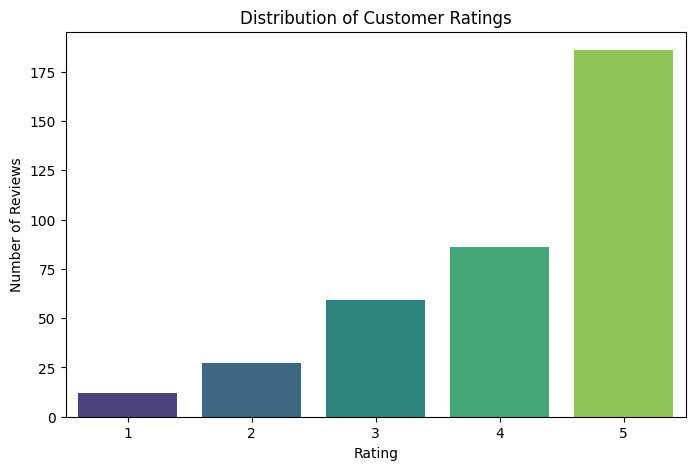

In [24]:
import seaborn as sns

 ## Descriptive statistics for ratings\n",
print("\n--- Descriptive Statistics for Ratings ---")
print(df['review_rating'].describe())

# Analyze review length\n",
df['review_length'] = df['review_text'].apply(len)
print("\n--- Review Length Statistics ---")
print(df['review_length'].describe())


# Visualize rating distribution\n",
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='review_rating', palette='viridis')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

## SENTIMENT ANALYSIS


Sentiment Analysis Counts:
Sentiment
Positive    285
Neutral      76
Negative      9
Name: count, dtype: int64


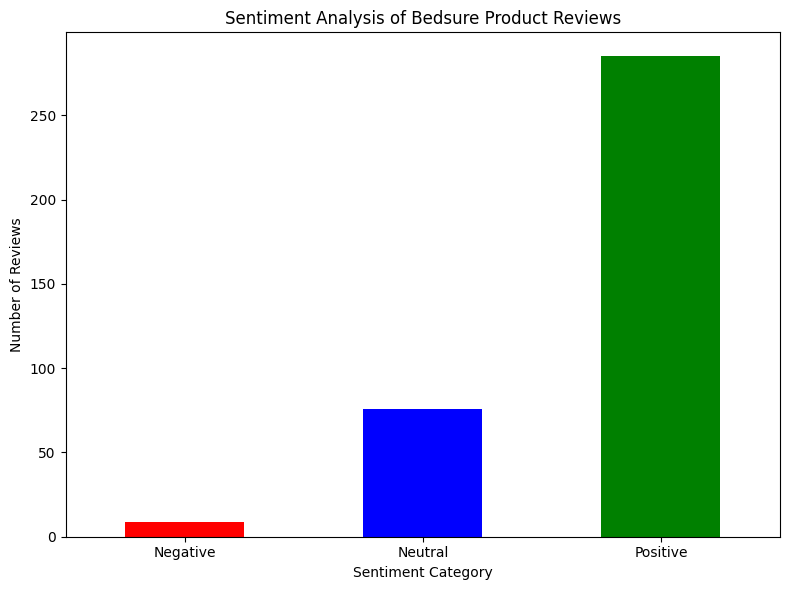

In [ ]:
## Sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')


# Perform sentiment analysis on the 'review_text' column
df['Sentiment_Polarity'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize the sentiment based on the polarity score
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Polarity'].apply(categorize_sentiment)

# Get the value counts for each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.sort_index().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Analysis of Bedsure Product Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sentiment_analysis_bar_chart.png')

# Print the final sentiment counts
print("\nSentiment Analysis Counts:")
print(sentiment_counts)

## BREESCRAPE REVIEW DATA(COMPETITOR)

In [25]:
## importing breescrape review data
# Load the data from the CSV file
file_path = "/content/drive/MyDrive/internpulse projects/AmazonReviewsScraper -breescrape.csv"
df_2 = pd.read_csv(file_path, encoding='latin-1')

df_2.head()

,ASIN,Brand,Product_name,Product_stars,Rating_count,Review_rating,Reviewer_name,Review_title,Review_content,Review_URL,Review_images,Is_verified,Helpful_count,Date,Country
0,B0DSPZKCCN,Breescape,Breescape Cooling Sheet Set Queen Size - Blend...,4.3,279.0,5.0,Brooklyn,"They really are cooling, worth the price",These sheets are SO worth the price. I was ske...,https://www.amazon.com/gp/customer-reviews/R3A...,NaN,True,NaN,8/20/2025,United States
1,B0DSPZKCCN,Breescape,Breescape Cooling Sheet Set Queen Size - Blend...,4.3,279.0,5.0,Angela Cherry,Gate keep I can not!,Have you heard of these cooling sheets? Theyr...,https://www.amazon.com/gp/customer-reviews/R3M...,NaN,True,12.0,6/22/2025,United States
2,B0DSPZKCCN,Breescape,Breescape Cooling Sheet Set Queen Size - Blend...,4.3,279.0,5.0,Jessica H,Comfy and Cooling,These sheets are amazing. Very smooth and cool...,https://www.amazon.com/gp/customer-reviews/R4F...,NaN,True,NaN,8/4/2025,United States
3,B0DSPZKCCN,Breescape,Breescape Cooling Sheet Set Queen Size - Blend...,4.3,279.0,4.0,D,Soft nice but not cooling so much,Very nice sheets well made but like everyone s...,https://www.amazon.com/gp/customer-reviews/R2N...,NaN,True,1.0,8/1/2025,United States
4,B0DSPZKCCN,Breescape,Breescape Cooling Sheet Set Queen Size - Blend...,4.3,279.0,5.0,Aubrey HalmanAubrey Halman,"Hot sleeper approved, cold fiancée approved, p...",I am in love with these sheets. They are soft ...,https://www.amazon.com/gp/customer-reviews/R19...,https://m.media-amazon.com/images/I/61gTjPaek4...,True,2.0,7/14/2025,United States


## EXPLORATORY DATA ANALYSIS

In [26]:
df_2.info

<bound method DataFrame.info of            ASIN      Brand                                       Product_name  \
0    B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
1    B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
2    B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
3    B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
4    B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
..          ...        ...                                                ...   
145  B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
146  B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
147  B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
148  B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   
149  B0DSPZKCCN  Breescape  Breescape Cooling Sheet Set Queen Size - Blend...   

     Product_stars  Rating_count  Review_rating               Reviewer_name  \
0              4.3         279.0            5.0                    Brooklyn   
1              4.3         279.0            5.0               Angela Cherry   
2              4.3         279.0            5.0                   Jessica H   
3              4.3         279.0            4.0                           D   
4              4.3         279.0            5.0  Aubrey HalmanAubrey Halman   
..             ...           ...            ...                         ...   
145            4.3         279.0            1.0                Tiffany Steo   
146            4.3         279.0            1.0            Amazon Purchaser   
147            4.3         279.0            1.0                      1Roach   
148            4.3         279.0            1.0                     Mi Dory   
149            4.3         279.0            1.0               Stephanie MBP   

                                          Review_title  \
0             They really are cooling, worth the price   
1                                 Gate keep I can not!   
2                                    Comfy and Cooling   
3                    Soft nice but not cooling so much   
4    Hot sleeper approved, cold fiancée approved, p...   
..                                                 ...   
145                                         dont do it   
146                                        Way too big   
147  STAINED our bedding and mattress dark blue! Do...   
148         Super slippery and comes off the mattress.   
149                                     Skipping these   

                                        Review_content  \
0    These sheets are SO worth the price. I was ske...   
1    Have you heard of these cooling sheets? Theyr...   
2    These sheets are amazing. Very smooth and cool...   
3    Very nice sheets well made but like everyone s...   
4    I am in love with these sheets. They are soft ...   
..                                                 ...   
145                                not cooling at all!   
146  Bought a queen, received a queen and the sheet...   
147  Don't buy dark blue! AFTER PRE WASHING... The ...   
148  Super slippery. I slide all over the bed with ...   
149  I couldn't even put these on the bed.  I go by...   

                                            Review_URL  \
0    https://www.amazon.com/gp/customer-reviews/R3A...   
1    https://www.amazon.com/gp/customer-reviews/R3M...   
2    https://www.amazon.com/gp/customer-reviews/R4F...   
3    https://www.amazon.com/gp/customer-reviews/R2N...   
4    https://www.amazon.com/gp/customer-reviews/R19...   
..                                                 ...   
145  https://www.amazon.com/gp/customer-reviews/R2B...   
146  https://www.amazon.com/gp/customer-reviews/R2Q...   
147  https://www.amazon.com/gp/customer-reviews/R11...   
148  https://www.amazon.com/gp/customer-reviews/R1S...   
149  https://w

In [27]:
df_2.dropna(inplace=True)

### SENTIMENT ANALYSIS
### RATING LENGTH
### RATING DISTRIBUTION


--- Descriptive Statistics for Ratings ---
count    8.00000
mean     4.75000
std      0.46291
min      4.00000
25%      4.75000
50%      5.00000
75%      5.00000
max      5.00000
Name: Review_rating, dtype: float64

--- Review Length Statistics ---
count     8.000000
mean     33.625000
std      20.989368
min      11.000000
25%      16.750000
50%      29.000000
75%      47.500000
max      63.000000
Name: review_length, dtype: float64


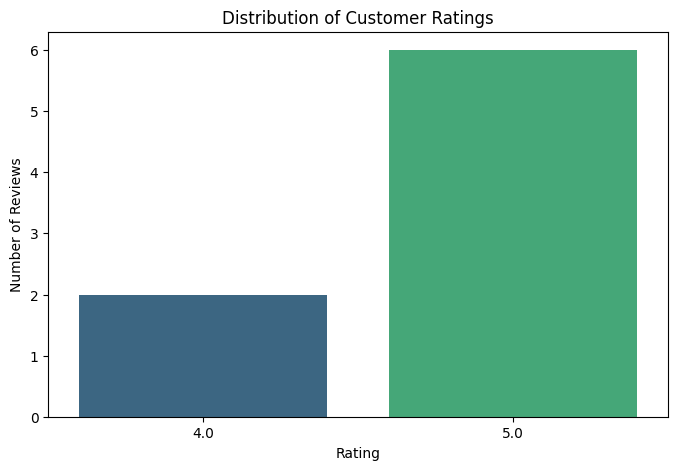

In [30]:
import seaborn as sns

 ## Descriptive statistics for ratings
print("\n--- Descriptive Statistics for Ratings ---")
print(df_2['Review_rating'].describe())

# Analyze review length,
df_2['review_length'] = df_2['Review_title'].apply(len)
print("\n--- Review Length Statistics ---")
print(df_2['review_length'].describe())


# Visualize rating distribution,
plt.figure(figsize=(8, 5))
sns.countplot(data=df_2, x='Review_rating', palette='viridis')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

## SENTIMENT ANALYSIS


Sentiment Analysis Counts:
Sentiment
Positive    6
Negative    2
Name: count, dtype: int64


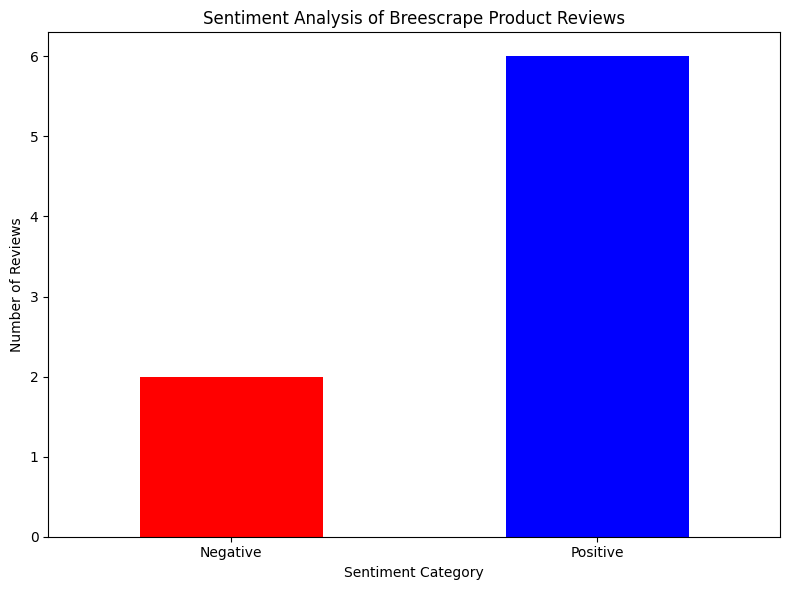

In [ ]:
# Perform sentiment analysis on the 'Review_title' column
df_2['Sentiment_Polarity'] = df_2['Review_title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize the sentiment based on the polarity score
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_2['Sentiment'] = df_2['Sentiment_Polarity'].apply(categorize_sentiment)

# Get the value counts for each sentiment category
sentiment_counts = df_2['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.sort_index().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Analysis of Breescrape Product Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sentiment_analysis_bar_chart.png')

# Print the final sentiment counts
print("\nSentiment Analysis Counts:")
print(sentiment_counts)